In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
# Some settings
#sns.set()
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.filterwarnings(\"ignore\") # only use this if warnings ares till being displayed
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv(r'./datasets/used-data/movie_metadata.csv')

In [4]:
data.shape

(5043, 28)

In [5]:
data.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3210,Color,William Friedkin,376.0,98.0,607.0,251.0,Scott A. Martin,11000.0,1987762.0,Crime|Drama|Romance|Thriller,Matthew McConaughey,Killer Joe,59297,11853,Carol Sutton,0.0,female nudity|female pubic hair|lingerie|neo n...,http://www.imdb.com/title/tt1726669/?ref_=fn_t...,216.0,English,USA,R,11000000.0,2011.0,414.0,6.7,1.85,12000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,91863,5405,Robert Clohessy,0.0,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
1398,Color,Wilson Yip,78.0,105.0,25.0,51.0,Lynn Hung,461.0,2126511.0,Action|Biography|Drama|History,Mike Tyson,Ip Man 3,21912,615,Kwok-Kwan Chan,0.0,1950s|cancer|hong kong|martial arts school|win...,http://www.imdb.com/title/tt2888046/?ref_=fn_t...,45.0,Cantonese,Hong Kong,PG-13,36000000.0,2015.0,79.0,7.2,2.35,12000
1228,Color,Joe Dante,100.0,108.0,287.0,823.0,Denis Leary,4000.0,53955614.0,Action|Adventure|Comedy|Family|Sci-Fi,Kirsten Dunst,Small Soldiers,77415,8610,Robert Picardo,0.0,action figure|battle|computer|military|toy,http://www.imdb.com/title/tt0122718/?ref_=fn_t...,139.0,English,USA,PG-13,40000000.0,1998.0,835.0,6.1,2.35,0
4519,Color,Harry Gantz,12.0,105.0,0.0,NaN,NaN,NaN,247740.0,Documentary|Drama,NaN,Sex with Strangers,285,0,NaN,0.0,bisexual|explicit sex|sex|stranger|swing,http://www.imdb.com/title/tt0304692/?ref_=fn_t...,8.0,English,USA,NaN,NaN,2002.0,NaN,4.7,1.33,51


In [6]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [8]:
pd.to_numeric(data['title_year'], errors = 'coerce', downcast = 'integer')

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4          NaN
         ...  
5038    2013.0
5039       NaN
5040    2013.0
5041    2012.0
5042    2004.0
Name: title_year, Length: 5043, dtype: float64

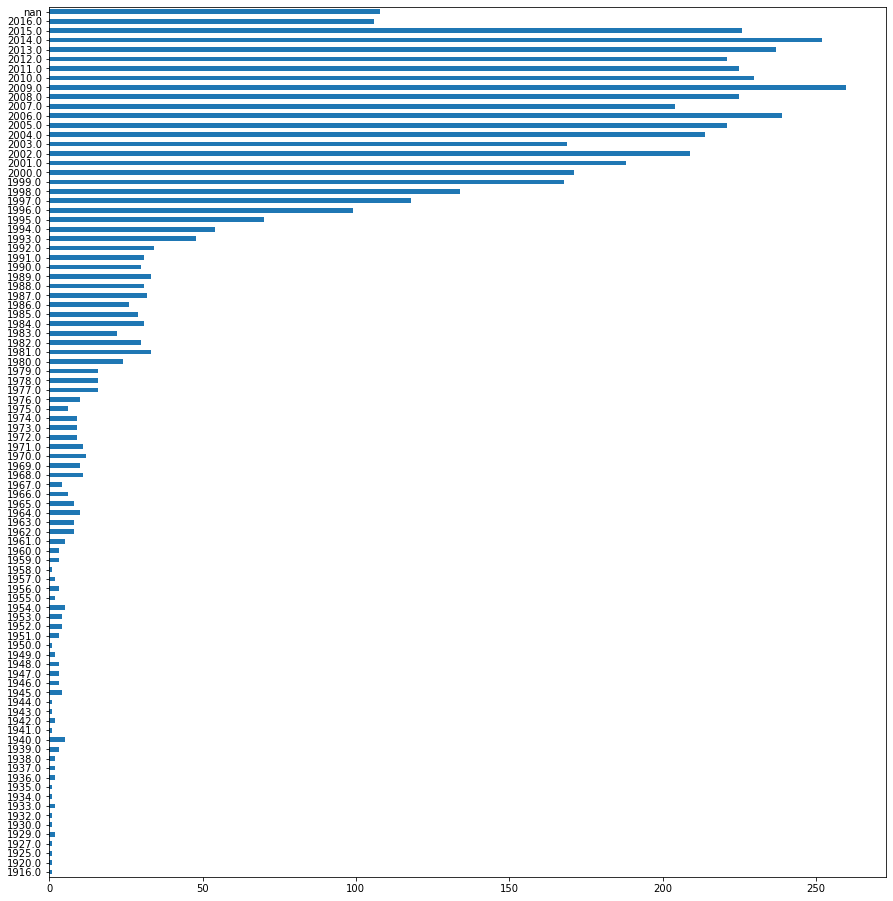

In [9]:
# we have movies only upto 2016
data['title_year'].value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(15,16))

In [10]:
# recommendation will be based on these features only
data = data.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [11]:
data.sample(5)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
1466,Chris Carter,Mitch Pileggi,Callum Rennie,Nicki Aycox,Drama|Mystery|Sci-Fi|Thriller,The X Files: I Want to Believe
771,Harold Ramis,Olivia Wilde,Oliver Platt,Xander Berkeley,Adventure|Comedy,Year One
2851,Preston A. Whitmore II,Mekhi Phifer,Chris Brown,Loretta Devine,Comedy|Drama|Romance,This Christmas
2553,John Whitesell,Leslie Bibb,Angus T. Jones,Paul Sorvino,Action|Comedy|Crime|Family,See Spot Run
3563,Robert Wise,David Wayne,Paula Kelly,Eric Christmas,Sci-Fi|Thriller,The Andromeda Strain


In [12]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [13]:
data.sample(5)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
3396,James Ivory,Anthony Hopkins,Vanessa Redgrave,Samuel West,Drama|Romance,Howards End
2277,Phillip Noyce,Brendan Fraser,Tzi Ma,Holmes Osborne,Drama|Mystery|Romance|Thriller|War,The Quiet American
4909,Jay Duplass,Greta Gerwig,Jennifer Lafleur,Elise Muller,Comedy|Drama|Horror|Romance,Baghead
4550,Martin Scorsese,Mick Jagger,Keith Richards,Albert Maysles,Biography|Documentary|Music,Shine a Light
683,David Fincher,Brad Pitt,Meat Loaf,Eugenie Bondurant,Drama,Fight Club


In [14]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [15]:
data.sample(5)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
4202,Rawson Marshall Thurber,Gary Cole,Stephen Root,Joel David Moore,Comedy Sport,Dodgeball: A True Underdog Story
4995,Chad Hartigan,Jan Haley,Paul Eenhoorn,Demetrius Grosse,Drama,This Is Martin Bonner
3608,Dominique Othenin-Girard,Donald Pleasence,Tamara Glynn,Troy Evans,Horror Thriller,Halloween 5
1315,Brian Robbins,John Gatins,Lou Saliba,Greg Collins,Comedy Drama,A Thousand Words
56,Mark Andrews,Kelly Macdonald,John Ratzenberger,Julie Walters,Adventure Animation Comedy Family Fantasy,Brave


In [16]:
data['movie_title'] = data['movie_title'].str.lower()

In [21]:
# null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [22]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [23]:
data['movie_title'][1]

"pirates of the caribbean: at world's en"

In [24]:
data.to_csv(r'./datasets/processed-data/data.csv', index=False)

In [25]:
credits = pd.read_csv(r'./datasets/used-data/credits.csv')

In [26]:
credits.sample(5)

,cast,crew,id
1752,"[{'cast_id': 4, 'character': 'Dreverhaven', 'c...","[{'credit_id': '52fe47099251416c7508bcaf', 'de...",17139
33130,"[{'cast_id': 1001, 'character': 'John Wayne Ga...","[{'credit_id': '52fe47f7c3a36847f8151d09', 'de...",51512
43757,"[{'cast_id': 4, 'character': ""Evie O'Connor"", ...","[{'credit_id': '54771ec99251415d7a001bd8', 'de...",227717
22478,"[{'cast_id': 3, 'character': 'Jennie', 'credit...","[{'credit_id': '52fe4a219251416c910c437f', 'de...",89581
31062,"[{'cast_id': 0, 'character': 'Mike', 'credit_i...","[{'credit_id': '550495f9c3a368262e0013ae', 'de...",330011


In [27]:
meta = pd.read_csv(r'./datasets/used-data/movies_metadata.csv')

C:\Users\BOluga\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [29]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  4494 non-null   object        
 2   budget                 45466 non-null  object        
 3   genres                 45466 non-null  object        
 4   homepage               7782 non-null   object        
 5   id                     45466 non-null  object        
 6   imdb_id                45449 non-null  object        
 7   original_language      45455 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               44512 non-null  object        
 10  popularity             45461 non-null  object        
 11  poster_path            45080 non-null  object        
 12  production_companies   45463 non-null  object        
 13  p

In [30]:
meta['year'] = meta['release_date'].dt.year

In [31]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [32]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file. 
# We don't have enough data for the movies from 2018, 2019 and 2020. 
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [33]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [34]:
new_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 26560 to 45465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genres  532 non-null    object 
 1   id      532 non-null    object 
 2   title   532 non-null    object 
 3   year    532 non-null    float64
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [35]:
new_meta['id'] = new_meta['id'].astype(int)

In [36]:
data = pd.merge(new_meta, credits, on='id')

In [39]:
pd.set_option('display.max_colwidth', 75)

In [40]:
data.sample(5)

,genres,id,title,year,cast,crew
122,"[{'id': 35, 'name': 'Comedy'}]",439107,Katherine Ryan: In Trouble,2017.0,"[{'cast_id': 0, 'character': 'Herself', 'credit_id': '589510c99251412e1...","[{'credit_id': '58a5f5a3c3a3681c030010e5', 'department': 'Directing', '..."
130,"[{'id': 18, 'name': 'Drama'}]",437623,Hostages,2017.0,"[{'cast_id': 1, 'character': '', 'credit_id': '588bbc229251410bef00539b...","[{'credit_id': '588bbbe5925141553e01f937', 'department': 'Directing', '..."
45,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name': 'Comedy'}]",377691,The Man,2017.0,"[{'cast_id': 2, 'character': 'Casper', 'credit_id': '588e37779251411846...","[{'credit_id': '5699f32cc3a3686fa8000755', 'department': 'Directing', '..."
229,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}]",339846,Baywatch,2017.0,"[{'cast_id': 0, 'character': 'Mitch Buchanan', 'credit_id': '55511fa0c3...","[{'credit_id': '591257799251414e8504abba', 'department': 'Writing', 'ge..."
9,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",297762,Wonder Woman,2017.0,"[{'cast_id': 0, 'character': 'Wonder Woman / Diana Prince', 'credit_id'...","[{'credit_id': '56a93fca9251417dcb001e9f', 'department': 'Writing', 'ge..."


In [42]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [43]:
data.sample(5)

,genres,id,title,year,cast,crew
179,"[{'id': 35, 'name': 'Comedy'}]",446048,Jim Norton: Mouthful of Shame,2017.0,"[{'cast_id': 0, 'character': 'Himself', 'credit_id': '58c1e236925141732...","[{'credit_id': '5932a815c3a3685a4500b13b', 'department': 'Writing', 'ge..."
117,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}, {'id': 10...",330947,Song to Song,2017.0,"[{'cast_id': 22, 'character': 'Cook', 'credit_id': '5787d69992514131c70...","[{'credit_id': '5787d9fac3a36839290015cb', 'department': 'Production', ..."
282,"[{'id': 99, 'name': 'Documentary'}]",450945,I Am Heath Ledger,2017.0,"[{'cast_id': 0, 'character': 'Himself', 'credit_id': '58e6bd1fc3a36872e...","[{'credit_id': '58e6bde8c3a3684aa4036dbf', 'department': 'Directing', '..."
517,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 1075...",434166,Bye Bye Germany,2017.0,"[{'cast_id': 1, 'character': 'Fränkel', 'credit_id': '587420f2c3a368173...","[{'credit_id': '587420e09251410e65013d7a', 'department': 'Directing', '..."
259,"[{'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}, {'id':...",435737,Rufus 2,2017.0,"[{'cast_id': 0, 'character': 'Rufus', 'credit_id': '587f625492514139020...","[{'credit_id': '587f631fc3a3682ea5008fa0', 'department': 'Directing', '..."


In [61]:
def make_genres_list(x):
    gen = []
    for i in x:
        if i.get('name') == 'Science Fiction':
            gen.append('Sci-Fi')
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else: return (' '.join(gen))

In [54]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [55]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [56]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [59]:
def get_directors(x):
    dt = []
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (' '.join(dt))

In [62]:
data['genres_list'] = data['genres'].map(lambda x: make_genres_list(x))
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [64]:
data[['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [65]:
movie = data.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [66]:
movie.sample(5)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
14,Sean Byrne,Ethan Embry,Shiri Appleby,Kiara Glasco,Horror,The Devil's Candy
308,Jay Woelfel,Tim Thomerson,Richard Hatch,Tiffany Shepis,Horror,Asylum of Darkness
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,Can't Buy My Love
305,Sierra Pettengill Pacho Velez,Ronald Reagan,Nancy Reagan,Barbara Walters,Documentary,The Reagan Show
23,Olivia Neergaard-Holm Jon Nguyen Rick Barnes,David Lynch,NaN,NaN,Documentary,David Lynch: The Art Life


In [67]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [68]:
movie = movie.dropna(how='any')

In [69]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [205]:
def create_comb_col(df):
    df['comb'] = df['actor_1_name'] + ' ' + df['actor_2_name'] + ' '+ df['actor_3_name'] + ' '+ df['director_name'] +' ' + df['genres'].replace('  ', ' ')
    return df

In [204]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [70]:
movie = movie.rename(columns={'genres_list':'genres', 'title':'movie_title'})
movie.sample(5)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
345,Tim Smit,Dan Stevens,Bérénice Marlohe,Charity Wakefield,Sci-Fi,Kill Switch
16,Lloyd Kaufman,Asta Paredes,Catherine Corcoran,Zac Amino,Comedy Horror,"Return to Return to Nuke 'Em High, aka Volume 2"
109,Ben Browder,Gina Gershon,Sean Astin,Sammi Hanratty,Mystery Comedy Thriller Sci-Fi Fantasy,Bad Kids of Crestview Academy
410,Carlo Guillermo Proto,Denis Harting,Peggy Roux,Lauviah Harting,Documentary,Resurrecting Hassan
473,Antonio Negret,Scott Eastwood,Freddie Thorp,Ana de Armas,Thriller Action,Overdrive


In [71]:
old = pd.read_csv('./datasets/processed-data/data.csv')
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avata
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's en
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectr
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rise
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivere
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasan
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai callin


In [73]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avata,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's en,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectr,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rise,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivere,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasan,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai callin,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [74]:
new = old.append(movie)
new.tail()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,The Incredible Jessica James,NaN
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,Can't Buy My Love,NaN
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara,NaN
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit,NaN
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom,NaN


In [75]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avata,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's en,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectr,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rise,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,The Incredible Jessica James,NaN
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,Can't Buy My Love,NaN
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara,NaN
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit,NaN


In [76]:
new.to_csv('./datasets/processed-data/new_data.csv',index=False)

## Extracting features of 2018 movies from Wikipedia

In [77]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [78]:
df1

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6]
...,...,...,...,...,...,...
69,MARCH,29,Ready Player One,Warner Bros. Pictures / Village Roadshow Pictures / Amblin Entertainment,"Steven Spielberg (director); Ernest Cline, Zak Penn (screenplay); Tye S...",[71]
70,MARCH,30,Tyler Perry's Acrimony,Lionsgate / Tyler Perry Films,"Tyler Perry (director/screenplay); Taraji P. Henson, Lyriq Bent, Tika S...",[72]
71,MARCH,30,God's Not Dead: A Light in Darkness,Pure Flix,"Michael Mason (director/screenplay); David A. R. White, John Corbett, S...",[73]
72,MARCH,30,Gemini,Neon,"Aaron Katz (director/screenplay); Lola Kirke, Zoë Kravitz, Greta Lee, M...",[74]


In [83]:
df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6]
...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[163]
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[137]
266,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[226]
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",[258]


In [89]:
from tmdbv3api import TMDb
from tmdbv3api import Movie
import json
import requests

In [202]:
import config

In [203]:
tmdb = TMDb()
tmdb_movie = Movie()
tmdb.api_key = config.API_KEY

In [179]:
def get_genre(x, verification=True):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id, tmdb.api_key), verify=verification)
    data_json = response.json()
    if data_json['genres']:
        for i in range(0, len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return ' '.join(genres)
    else:
        np.NaN

In [96]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [97]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],Action Thriller
...,...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[163],Mystery Adventure Comedy Crime
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[137],Comedy Romance Crime Drama Mystery
266,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[226],Drama History
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",[258],Thriller Crime Drama Action


In [105]:
df_2018 = df[['Title','Cast and crew','genres']]

In [106]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [107]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [108]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [109]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [110]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))
df_2018

C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
264,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
265,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Comedy Romance Crime Drama Mystery,Adam McKay,Christian Bale,Amy Adams,Steve Carell
266,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [111]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [112]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [113]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,The Commuter
...,...,...,...,...,...,...
264,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
265,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Comedy Romance Crime Drama Mystery,Vice
266,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
267,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [114]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [115]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [116]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

## Extracting features of 2019 movies from Wikipedia

In [117]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [118]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [119]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [120]:
df_2019 = df[['Title','Cast and crew','genres']]

In [121]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [122]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [123]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [124]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [125]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [126]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [127]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Thriller Action Mystery Horror,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Thriller Acti...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [128]:
my_df = new_df18.append(new_df19,ignore_index=True)
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thri...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thr...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thriller
...,...,...,...,...,...,...,...
506,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
507,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
508,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
509,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [129]:
old_df = pd.read_csv('./datasets/processed-data/new_data.csv')
final_df = old_df.append(my_df,ignore_index=True)
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avata,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's en,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectr,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rise,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5849,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
5850,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
5851,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Act...
5852,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [130]:
final_df.isna().sum()

director_name      0
actor_1_name       0
actor_2_name       0
actor_3_name       0
genres             3
movie_title        1
comb             461
dtype: int64

In [131]:
final_df = final_df.dropna(how='any')

In [132]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [133]:
final_df.to_csv('./datasets/processed-data/final_data.csv',index=False)

## Extracting features of 2020 movies from Wikipedia

In [160]:
import bs4 as bs
import urllib.request

In [165]:
link = 'https://en.wikipedia.org/wiki/List_of_American_films_of_2020'

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source, 'lxml')

tables = soup.find_all('table',class_='wikitable sortable')

In [166]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [167]:
df = df1.append(df2.append(df3.append(df4, ignore_index=True), ignore_index=True), ignore_index=True)

In [189]:
df_2020 = df[['Title', 'Cast and crew']]
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,..."
...,...,...
267,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa..."
268,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...
269,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El..."
270,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis..."


In [190]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})
df_2020

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
267,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",Action Fantasy Family Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
268,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,Action Adventure Drama Western,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
269,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
270,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [196]:
new_df20 = df_2020.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,Inherit the Viper
...,...,...,...,...,...,...
267,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,We Can Be Heroes
268,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,Action Adventure Drama Western,News of the World
269,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
270,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,Promising Young Woman


In [197]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [198]:
new_df20 = new_df20.dropna(how='any')

In [199]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

C:\Users\BOluga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
old_df = pd.read_csv('./datasets/processed-data/final_data.csv')
final_df = old_df.append(new_df20, ignore_index=True)
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avata,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's en,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectr,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rise,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5631,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Family Animation Music Comedy Drama,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Family Animation Music Co...
5632,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
5633,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
5634,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [201]:
final_df.to_csv('./datasets/processed-data/main_data.csv', index=False)